# In-Class Assignment: Exploring Regression Techniques
Objective:
The goal of this assignment is to apply five regression techniques—Multiple Linear Regression (MLR), Stochastic Gradient Descent (SGD), Ridge Regression, Lasso Regression, and Polynomial Regression—on a from Kaggle. You will compare the performance of these models and interpret the results.
https://www.kaggle.com/datasets/CooperUnion/cardataset

### Import necessary libraries

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load a dataset
df=pd.read_csv("data-3.csv")

In [3]:
# Check data
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## What are the basic properties of the dataset

- What is the shape of the dataset (number of rows and columns)?
- What are the column names, and what do they represent?
- What is the data type of each column?

In [4]:
df.shape

(11914, 16)

In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

### Missing Data
- Are there any missing values in the dataset?
- Which columns have missing values, and how many?

In [7]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Descriptive Statistics:
- What are the summary statistics of the numerical columns?
- What are the mean, median, min, max, and standard deviation of the numerical columns?

In [8]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


### Target Variable:
How is the target variable distributed?

If the target variable is numerical (e.g., house prices, car prices or insurance charges), plot a histogram to visualize its distribution.

Text(0.5, 1.0, 'MSRP Histogram')

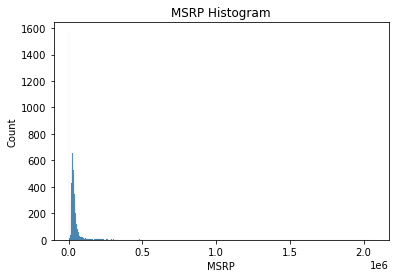

In [10]:
sns.histplot(df['MSRP'])
plt.title("MSRP Histogram")

In [11]:
df["MSRP"].skew()

11.771987129334972

<AxesSubplot:xlabel='MSRP', ylabel='Density'>

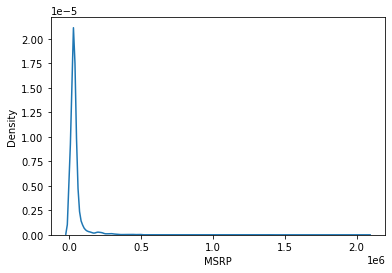

In [12]:
sns.kdeplot(df["MSRP"])

##### the target variable is right skewed 

### Relationships Between Features:
- Are there correlations between the numerical variables?

- Are there features that are highly correlated (positively or negatively)?
- How does each feature correlate with the target variable?

In [13]:
df_num=df.select_dtypes('number')

In [14]:
df_num.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [15]:
df_num.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


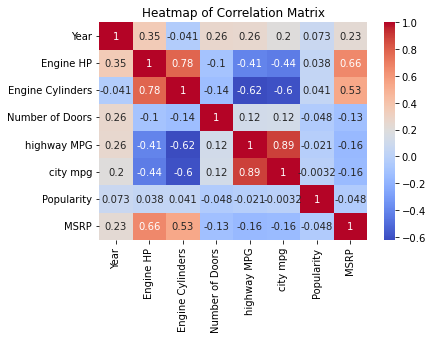

In [16]:
correlation_matrix = df[['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors','highway MPG',
                           'city mpg','Popularity','MSRP']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

### Are there any potential outliers in the dataset?
- Use boxplots or scatter plots to identify potential outliers.
- Should outliers be removed or dealt with in some other way?

In [17]:
numeric_nunique = df.select_dtypes('number').nunique()
print(numeric_nunique)

Year                  28
Engine HP            356
Engine Cylinders       9
Number of Doors        3
highway MPG           59
city mpg              69
Popularity            48
MSRP                6049
dtype: int64


In [18]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year                    9.00
Engine HP             130.00
Engine Cylinders        2.00
Number of Doors         2.00
highway MPG             8.00
city mpg                6.00
Popularity           1460.00
MSRP                21231.25
dtype: float64


In [19]:
outlier=df[((df<(Q1-1.4*IQR))*(df>(Q3+1.4*IQR))).any(axis=1)]
print(outlier)

Empty DataFrame
Columns: [Make, Model, Year, Engine Fuel Type, Engine HP, Engine Cylinders, Transmission Type, Driven_Wheels, Number of Doors, Market Category, Vehicle Size, Vehicle Style, highway MPG, city mpg, Popularity, MSRP]
Index: []


/var/folders/rb/71t238sj79vbnh5kkw9_t8x80000gn/T/ipykernel_41453/2280963087.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier=df[((df<(Q1-1.4*IQR))*(df>(Q3+1.4*IQR))).any(axis=1)]


In [ ]:
data_no_outlier=data[~((data<Q1-1.4*IQR))|(data>(Q3+1.4*IQR))]

### Data Cleaning:
- Are there any issues in the data that need to be cleaned?

- Are there duplicated rows that should be removed?

In [20]:
print("Total duplicate values are '", df.duplicated().sum(), "'.")

Total duplicate values are ' 715 '.


In [21]:
df = df.drop_duplicates()

In [22]:
print("Total duplicate values are '", df.duplicated().sum(), "'.")

Total duplicate values are ' 0 '.


In [23]:
df_new = df.drop('Market Category', axis=1)

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11199 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11199 non-null  object 
 1   Model              11199 non-null  object 
 2   Year               11199 non-null  int64  
 3   Engine Fuel Type   11196 non-null  object 
 4   Engine HP          11130 non-null  float64
 5   Engine Cylinders   11169 non-null  float64
 6   Transmission Type  11199 non-null  object 
 7   Driven_Wheels      11199 non-null  object 
 8   Number of Doors    11193 non-null  float64
 9   Vehicle Size       11199 non-null  object 
 10  Vehicle Style      11199 non-null  object 
 11  highway MPG        11199 non-null  int64  
 12  city mpg           11199 non-null  int64  
 13  Popularity         11199 non-null  int64  
 14  MSRP               11199 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


### Split into features and target

In [25]:
X=df.drop('MSRP',axis=1)
y=df['MSRP']

### Feature Engineering

In [26]:
# Identify numerical and categorical columns
numerical_features=X.select_dtypes(include="number").columns
numerical_features

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity'],
      dtype='object')

In [27]:
cat_features=X.select_dtypes(include="object").columns
cat_features

Index(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'],
      dtype='object')

### Preprocessing Pipelines

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding
])

# Combine preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




NameError: name 'categorical_features' is not defined

### Create a function to build and evaluate models using pipelines

In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model.named_steps['model'].__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print('-' * 50)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model pipelines

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
# Linear Regression Pipeline
linear_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Ridge Regression Pipeline
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

# Lasso Regression Pipeline
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

# Stochastic Gradient Descent (SGD) Pipeline
sgd_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SGDRegressor(max_iter=1000, tol=1e-3))
])
# Polynomial Regression Pipeline (degree=2)
polynomial_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])



### Evaluate all models

In [ ]:
from sklearn.metrics import r2_score
for model in [linear_pipeline, ridge_pipeline, lasso_pipeline, sgd_pipeline, polynomial_pipeline]:
    evaluate_model(model, X_train, X_test, y_train, y_test)

### Interpretation:
Discuss the effectiveness of each model. Which model performed the best and why?

### Submission Requirements:

Submit your Jupyter notebook with the code for all models on Moodle using Github.
Include clear markdown cells explaining your approach, observations from EDA, preprocessing steps, and a detailed discussion of the results.